In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load the data
import numpy as np
import pandas as pd

train_roberta = pd.read_csv("/content/drive/MyDrive/RoBERTa_model/train.En.csv")
test_roberta = pd.read_csv("/content/drive/MyDrive/RoBERTa_model/task_A_En_test.csv")

In [ ]:
#inspect data
train_roberta.head()
train_roberta.tail()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3467,3467,Overheard as my 13 year old games with a frien...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#take only useful columns from train data (e.g. tweet and sarcastic)
train_roberta = train_roberta[['tweet', 'sarcastic']]
train_roberta.head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


In [ ]:
# inspect NA from train and test
train_roberta.isna().sum()
test_roberta.isna().sum()

text         0
sarcastic    0
dtype: int64

In [ ]:
#no NA values in train and test data
#clean text
import re

def clean_text(text):
    if isinstance(text, str): # ensures text is a string before cleaning
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        text = re.sub(r'#', '', text)
        text = re.sub(r'RT[\s]+', '', text)
        text = re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r':', '', text)
        text = re.sub(r'‚Ä¶', '', text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        return text
    # if text is not a string, return an empty string
    else:
        return ''

In [ ]:
#apply clean text to train and test data
train_roberta['tweet'] = train_roberta['tweet'].apply(clean_text)
test_roberta['text'] = test_roberta['text'].apply(clean_text)

In [ ]:
# Creating a validation set that is a random subset (10%) of the training set

# Calculate what the number of samples for the validation set should be(10% of the training set)
num_validation_samples = int(len(train_roberta) * 0.1)

# Shuffle the indices of the training data
indices = train_roberta.index.tolist()
np.random.shuffle(indices)

# Select the first num_validation_samples indices for the validation set
validation_indices = indices[:num_validation_samples]

# Create the validation set by selecting the rows corresponding to the validation indices
validation_df = train_roberta.loc[validation_indices]

# Create the training set by excluding the validation indices
training_df = train_roberta.drop(validation_indices)

# Print the sizes of the training and validation sets
print(f"Training set size: {len(training_df)}")
print(f"Validation set size: {len(validation_df)}")


Training set size: 3122
Validation set size: 346


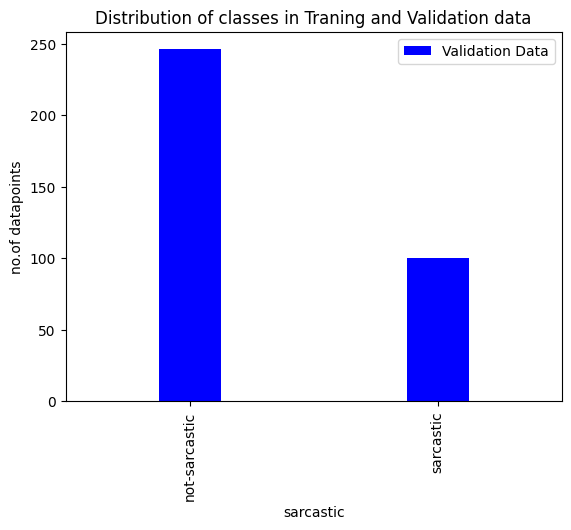

In [ ]:
#Showing the class distribution of the validation set
#(as long as it's not all non-sarcastic it's fine)

import matplotlib.pyplot as plt
import numpy as np

# Plot showing distribution of class 'sarcastic'
plt.figure()

# Plotting training and test data & their distribution
validation_df['sarcastic'].value_counts().plot(kind='bar', color='blue', width=0.25, position=0.5, label='Validation Data')
#training_df['sarcastic'].value_counts().plot(kind='bar', color='orange', width=0.25, position=0, label='Training Data')

# Setting the labels and everything
plt.xticks([0,1],['not-sarcastic', 'sarcastic'])
plt.xlim(-0.5, 1.5)
plt.ylabel('no.of datapoints')
plt.title('Distribution of classes in Traning and Validation data')
plt.legend()
plt.show()

In [ ]:
# Converting training_df and validation_df to csv files and exporting them to drive
# In this way, both (updated) sets are set and can be used for training the model
Train = training_df.to_csv("/content/drive/My Drive/RoBERTa_model", index=False)
Validation = validation_df.to_csv("/content/drive/My Drive/RoBERTa_model", index=False)